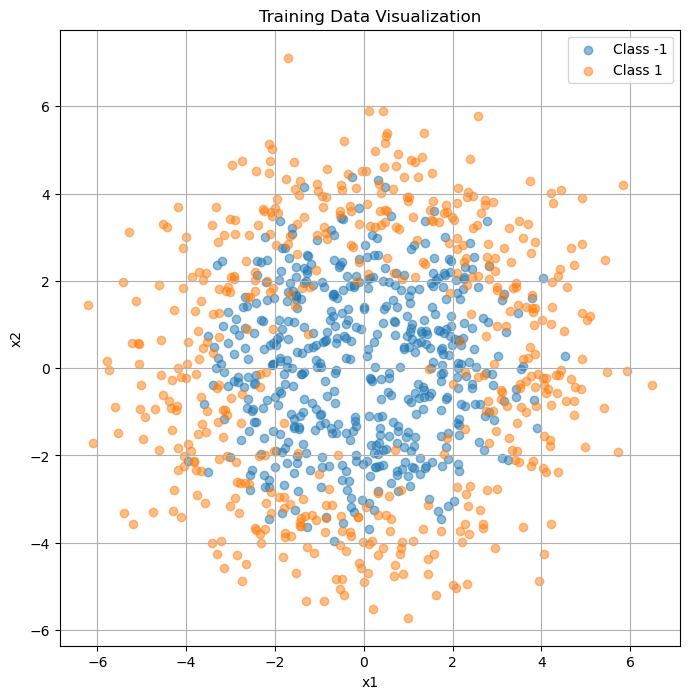

Best SVM Parameters: {'C': 1, 'gamma': 0.01}
SVM Test Accuracy: 0.8236


/opt/anaconda3/envs/env0/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/envs/env0/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/envs/env0/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Best MLP Parameters: {'activation': 'relu', 'hidden_layer_sizes': (100,)}
MLP Test Accuracy: 0.8281


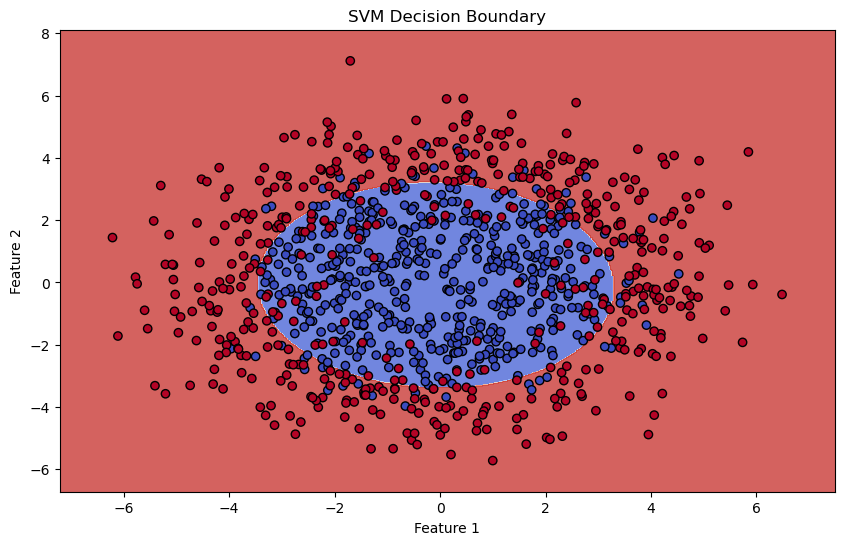

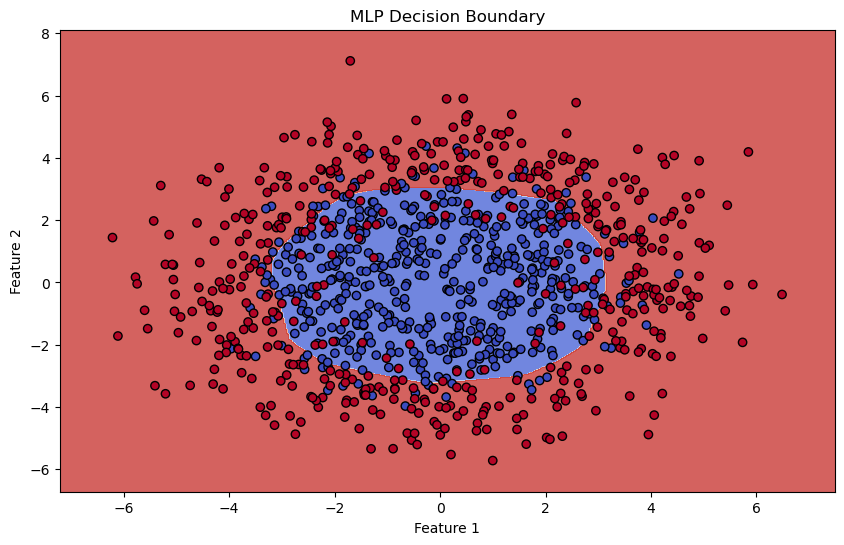

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score, GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score

# Set seed for reproducibility
np.random.seed(42)

# Generate data function
def generate_data(num_samples, r, label):
    theta = np.random.uniform(-np.pi, np.pi, num_samples)
    noise = np.random.normal(0, 1, (num_samples, 2))
    x = r * np.column_stack((np.cos(theta), np.sin(theta))) + noise
    y = np.full(num_samples, label)
    return x, y

# Function to plot decision boundaries
def plot_decision_boundary(model, X, y, title):
    # Create a mesh grid
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500), np.linspace(y_min, y_max, 500))

    # Predict on the mesh grid
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot the contour and training examples
    plt.figure(figsize=(10, 6))
    plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.coolwarm)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', cmap=plt.cm.coolwarm)
    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()

# Generate training data (1000 samples)
x_train_neg, y_train_neg = generate_data(500, 2, -1)
x_train_pos, y_train_pos = generate_data(500, 4, 1)
x_train = np.vstack((x_train_neg, x_train_pos))
y_train = np.hstack((y_train_neg, y_train_pos))


# Generate test data (10000 samples)
x_test_neg, y_test_neg = generate_data(5000, 2, -1)
x_test_pos, y_test_pos = generate_data(5000, 4, 1)
x_test = np.vstack((x_test_neg, x_test_pos))
y_test = np.hstack((y_test_neg, y_test_pos))

# Visualize the generated data
plt.figure(figsize=(8, 8))
plt.scatter(x_train[y_train == -1][:, 0], x_train[y_train == -1][:, 1], label='Class -1', alpha=0.5)
plt.scatter(x_train[y_train == 1][:, 0], x_train[y_train == 1][:, 1], label='Class 1', alpha=0.5)
plt.title('Training Data Visualization')
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()
plt.grid(True)
plt.show()

# SVM hyperparameter tuning using GridSearchCV
param_grid_svm = {
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 0.01, 0.1, 1, 10]
}
svm_model = SVC(kernel='rbf')
grid_svm = GridSearchCV(svm_model, param_grid_svm, cv=10)
grid_svm.fit(x_train, y_train)

# Print the best SVM parameters
print("Best SVM Parameters:", grid_svm.best_params_)

# Train the final SVM model
best_svm = grid_svm.best_estimator_
y_pred_svm = best_svm.predict(x_test)
svm_accuracy = accuracy_score(y_test, y_pred_svm)
print("SVM Test Accuracy:", svm_accuracy)

# MLP hyperparameter tuning using GridSearchCV
param_grid_mlp = {
    'hidden_layer_sizes': [(10,), (50,), (100,)],
    'activation': ['relu', 'tanh', 'logistic']
}
mlp_model = MLPClassifier(max_iter=1000)
grid_mlp = GridSearchCV(mlp_model, param_grid_mlp, cv=10)
grid_mlp.fit(x_train, y_train)

# Print the best MLP parameters
print("Best MLP Parameters:", grid_mlp.best_params_)

# Train the final MLP model
best_mlp = grid_mlp.best_estimator_
y_pred_mlp = best_mlp.predict(x_test)
mlp_accuracy = accuracy_score(y_test, y_pred_mlp)
print("MLP Test Accuracy:", mlp_accuracy)

# Train the final SVM model and visualize
plot_decision_boundary(best_svm, x_train, y_train, title='SVM Decision Boundary')

# Train the final MLP model and visualize
plot_decision_boundary(best_mlp, x_train, y_train, title='MLP Decision Boundary')